<a href="https://colab.research.google.com/github/sharmadharmpal/ColabRepo/blob/main/Eda_NY_AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project name: AirBNB data for NY state data for 2019 

What to find
1. which hosts are busiest and why
2. What areas have more traffic than others and why is that the case
3. Are there any relatioships between prices, number of reviews and the number of days that a given listing is booked

In [ ]:
#github

# Basic imports, Loading data and configuration

In [ ]:
# Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load data file
df=pd.read_csv("https://raw.githubusercontent.com/sharmadharmpal/PTestData/main/AirBnb_NY_2019.csv")

In [ ]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('white')

In [ ]:
# EDA

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.sample(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11360,8829421,2 Bed/ 2 Bath in Heart of SOHO/ LES,4087478,Nicole,Manhattan,Lower East Side,40.72159,-73.99234,Entire home/apt,699,6,0,NaN,NaN,1,0
27345,21581457,"Bright, large room with own 1/2 bath in great ...",1406432,Mary,Brooklyn,Prospect Heights,40.67502,-73.96447,Private room,75,3,38,2019-07-01,1.88,2,66


In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Drop unnecessary columns
ColsToDrop=['id','name','host_name','last_review','latitude','longitude']
df.drop(ColsToDrop,axis=1, inplace=True)

In [ ]:
df.fillna({'reviews_per_month':0},inplace=True)
#another way could be reviews per month, but we will do it later
#df['reviews_per_month'] = df.groupby('host_id').transform(lambda x: x.fillna(x.mean()))

In [ ]:
df.describe().apply(lambda s:s.apply(lambda x:format(x,'f')))

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,67620010.646610,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,78610967.032667,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2438.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7822033.000000,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,30793816.000000,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,107434423.000000,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,274321313.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# 1st question
 which hosts are busiest and why

 WHY part is not clear

# **Comments for Sonal**
calculated_host_listings_count is for number of listings
listing is basically not advertisement but is a booking where customer may or may not have provided review for, so count of host id is technically right anwer for most busiest hosts, but why is still a question

In [ ]:
# find top most host_id
#df['column'].nlargest(n=5)
top_host=df.host_id.value_counts().nlargest(n=10)
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'host_id','host_id':'Busy_Count'},inplace=True)
#top_host_df.Busy_Count.sort_values(ascending=False)


In [ ]:
top_host_df

,host_id,Busy_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

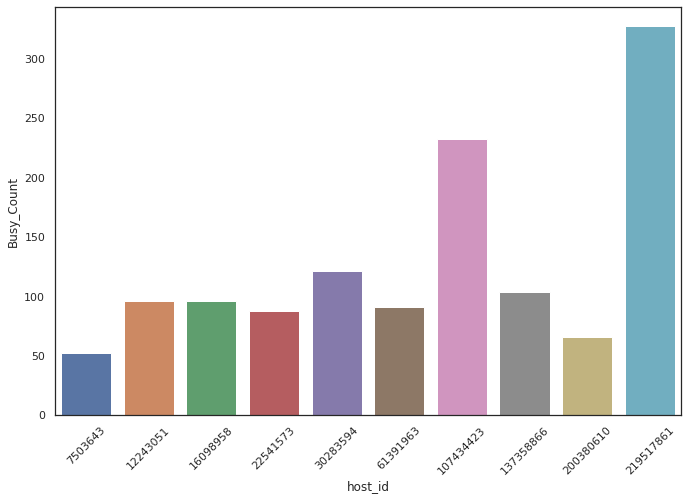

In [ ]:
tophost_plt=sns.barplot(x='host_id',y='Busy_Count',data=top_host_df)
tophost_plt.set_xticklabels(tophost_plt.get_xticklabels(),rotation=45)

#Trying to find 1st why

Most of them are from Manhattan, then Brooklyn and then Queens
But belwo Pie plot show Brooklyn more or less like Manhattan, so don't think this answers 1st question

In [ ]:
df.value_counts(['host_id','neighbourhood_group']).nlargest(10)#.plot(kind='bar')

host_id    neighbourhood_group
219517861  Manhattan              327
107434423  Manhattan              230
30283594   Manhattan              121
16098958   Manhattan               96
12243051   Manhattan               96
61391963   Manhattan               91
22541573   Manhattan               86
137358866  Queens                  79
200380610  Manhattan               65
7503643    Brooklyn                52
dtype: int64

In [ ]:
df_pie_nhood=df.neighbourhood_group.value_counts()

NOTE: Below plot is overall data plot for neighbourhod_group
---



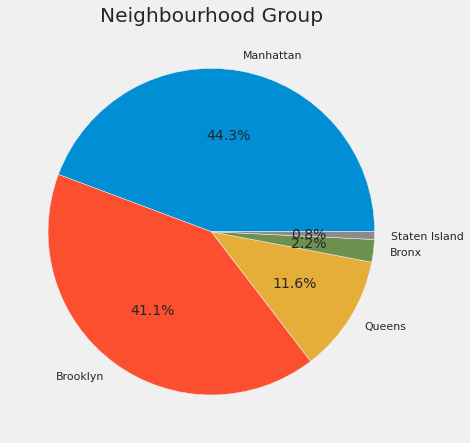

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title('Neighbourhood Group')
g=plt.pie(df_pie_nhood,labels=df_pie_nhood.index,autopct='%1.1f%%',startangle=0)
plt.show()


# Let us see how host_id with roomtype relationship goes, looks better
as per below plot

In [ ]:
df.value_counts(['host_id','room_type']).nlargest(10)#.plot(kind='bar')

host_id    room_type      
219517861  Entire home/apt    319
107434423  Entire home/apt    232
30283594   Entire home/apt    121
137358866  Private room       101
12243051   Entire home/apt     96
16098958   Entire home/apt     95
61391963   Entire home/apt     91
22541573   Entire home/apt     87
200380610  Entire home/apt     65
7503643    Entire home/apt     52
dtype: int64

#Sonal

Below plot could be done in pie chart as well, code commented

In [ ]:
#df_pie_Room_type=df.room_type.value_counts()
#plt.pie(df_pie_Room_type, labels=df_pie_Room_type.index,autopct='%1.1f%%',startangle=0)

NOTE: This is overall distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


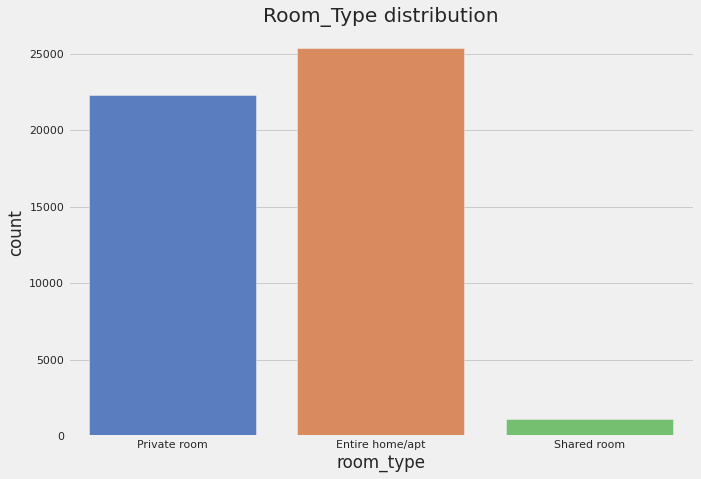

In [ ]:

plt.title('Room_Type distribution')
sns.countplot(df.room_type, palette="muted")
#fig=plt.gcf()

#Sonal
Below plot is to see RoomType distribution under neighbourhood_group 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


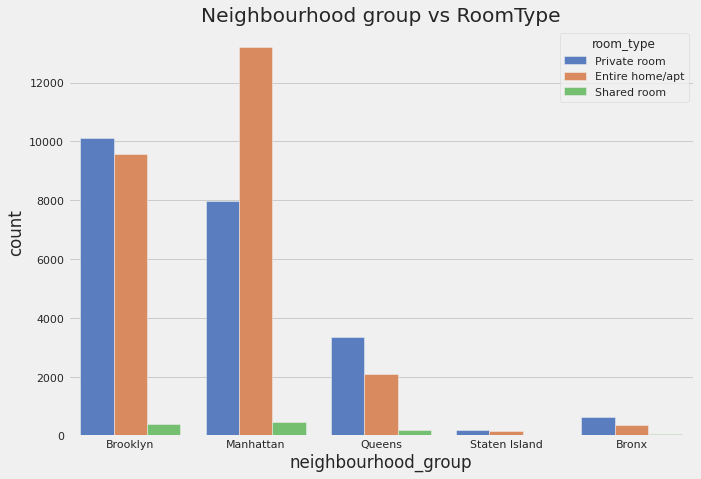

In [ ]:
plt.title('Neighbourhood group vs RoomType')
sns.countplot(df.neighbourhood_group,hue=df.room_type,palette='muted')

In [ ]:
df.value_counts(['host_id','availability_365']).nlargest(10) #.plot(kind='bar')

host_id    availability_365
200380610  364                 30
30283594   365                 26
2856748    364                 21
1475015    365                 18
22541573   365                 16
120762452  365                 16
19303369   0                   16
120762452  364                 15
30283594   352                 15
219517861  333                 14
dtype: int64

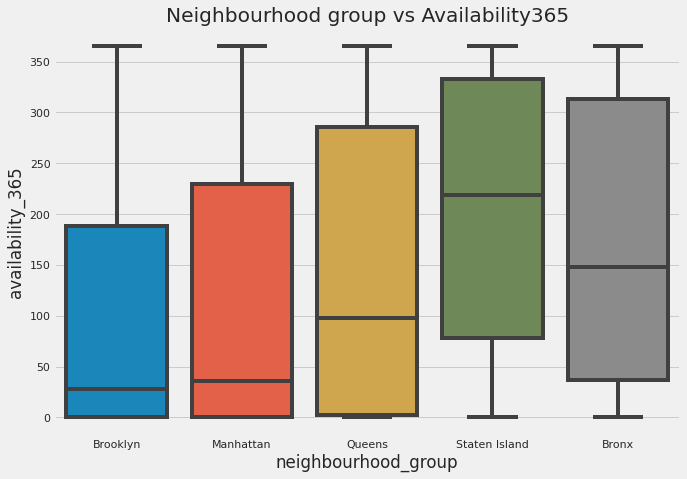

In [ ]:
plt.title('Neighbourhood group vs Availability365')
sns.boxplot(data=df,x='neighbourhood_group',y='availability_365')

In [ ]:
df.value_counts(['host_id','neighbourhood_group']).nlargest(10) #.plot(kind='bar')

host_id    neighbourhood_group
219517861  Manhattan              327
107434423  Manhattan              230
30283594   Manhattan              121
16098958   Manhattan               96
12243051   Manhattan               96
61391963   Manhattan               91
22541573   Manhattan               86
137358866  Queens                  79
200380610  Manhattan               65
7503643    Brooklyn                52
dtype: int64

# Let us see any coorelation before removing outliers

In [ ]:
corr=df.corr()
corr

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
price,0.015309,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.017364,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.140106,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.209783,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.154950,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.203492,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


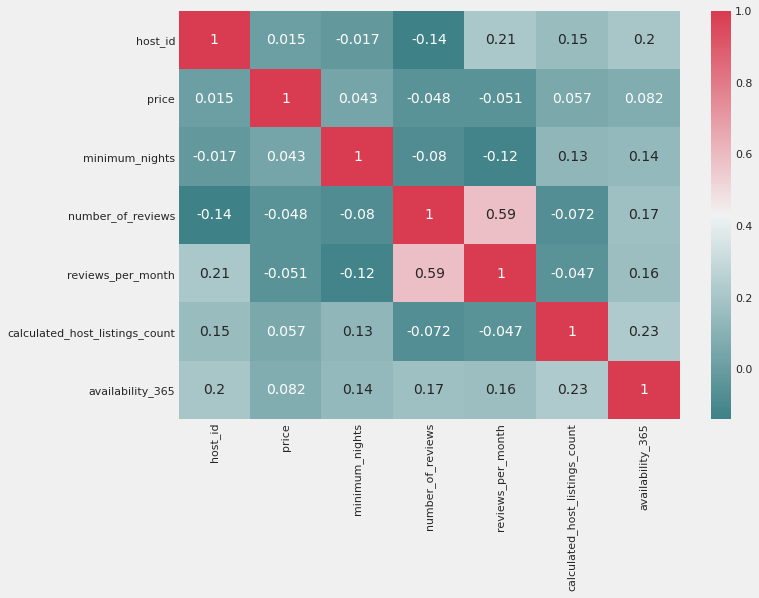

In [ ]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap = sns.diverging_palette(200,8,as_cmap=True))

#After removing outliers  on price

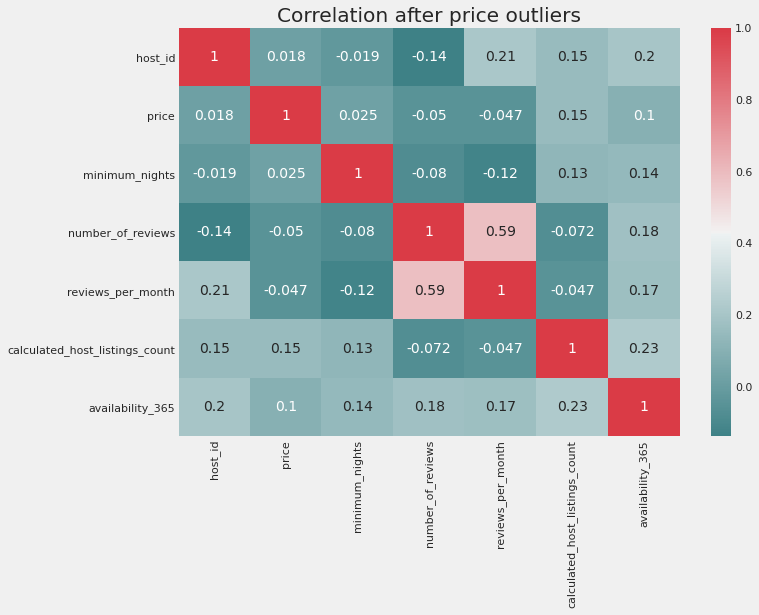

In [ ]:
plt.title('Correlation after price outliers')
mean=np.mean(df.price)
cut_off=np.std(df.price) * 2

df = df[(df.price >=mean - cut_off  )&(df.price <=mean + cut_off )].copy()
df_corr=df.corr()
sns.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels=df_corr.columns,annot=True,cmap = sns.diverging_palette(200,10,as_cmap=True))

In [ ]:
df.shape

(48128, 10)

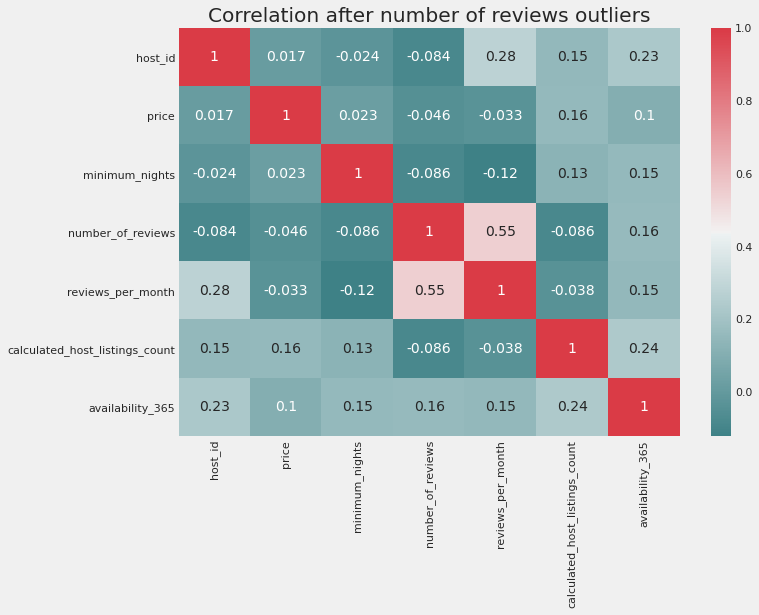

In [ ]:
plt.title('Correlation after number of reviews outliers')
mean=np.mean(df.number_of_reviews)
cut_off=np.std(df.number_of_reviews) * 2

df = df[(df.number_of_reviews <=mean + cut_off ) &(df.number_of_reviews >=mean - cut_off  )].copy()
df_corr=df.corr()
sns.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels=df_corr.columns,annot=True,cmap = sns.diverging_palette(200,10,as_cmap=True))


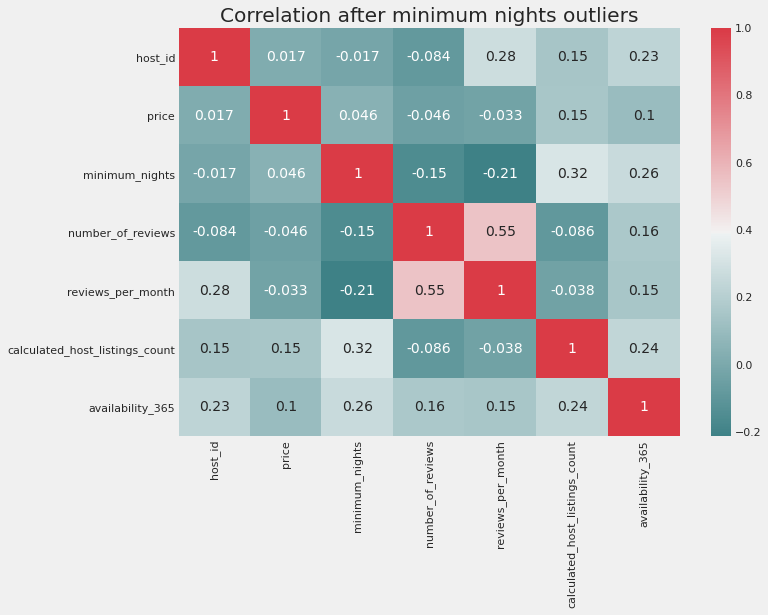

In [ ]:
plt.title('Correlation after minimum nights outliers')
mean=np.mean(df.minimum_nights)
cut_off=np.std(df.minimum_nights) * 2

df = df[(df.minimum_nights <=mean + cut_off ) &(df.minimum_nights >=mean - cut_off  )].copy()
df_corr=df.corr()
sns.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels=df_corr.columns,annot=True,cmap = sns.diverging_palette(200,10,as_cmap=True))


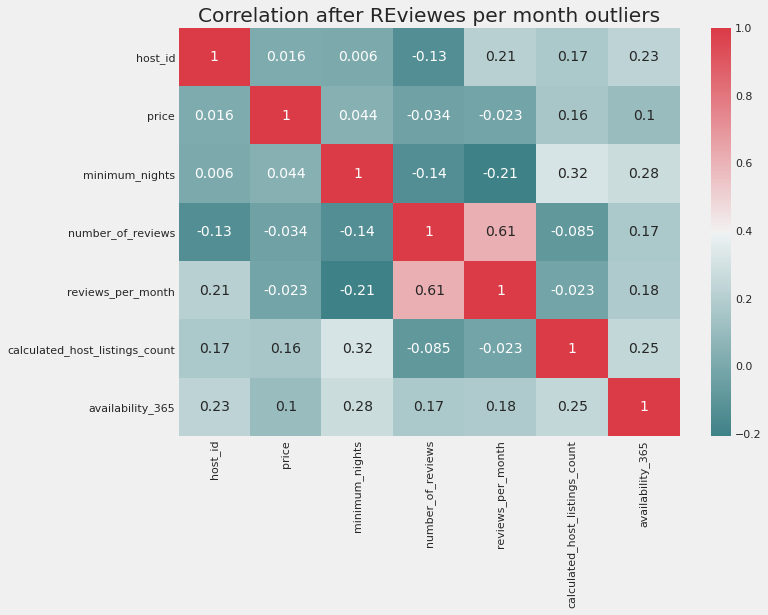

In [ ]:
plt.title('Correlation after REviewes per month outliers')
mean=np.mean(df.reviews_per_month)
cut_off=np.std(df.reviews_per_month) * 2

df = df[(df.reviews_per_month <=mean + cut_off ) &(df.reviews_per_month >=mean - cut_off  )].copy()
df_corr=df.corr()
sns.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels=df_corr.columns,annot=True,cmap = sns.diverging_palette(200,10,as_cmap=True))


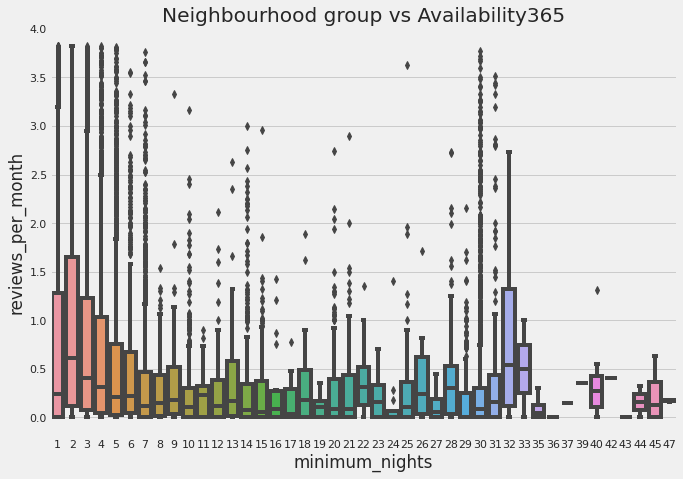

In [ ]:
plt.title('Neighbourhood group vs Availability365')
sns.boxplot(data=df,x='minimum_nights',y='reviews_per_month')

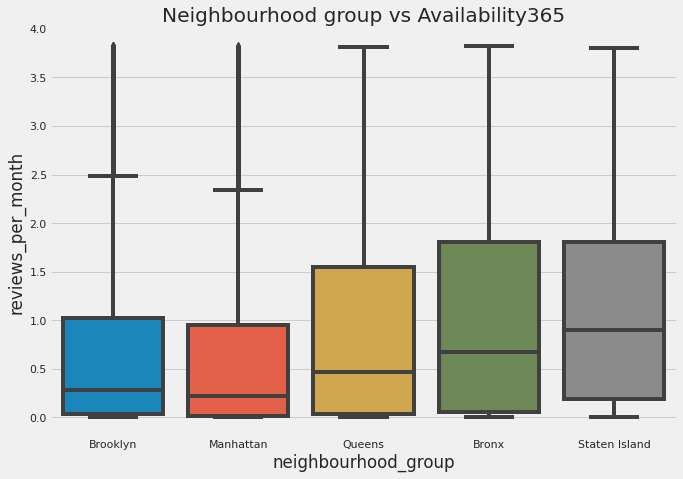

In [ ]:
plt.title('Neighbourhood group vs Availability365')
sns.boxplot(data=df,x='neighbourhood_group',y='reviews_per_month')

#Use of Group by method - 
Method 3 to group by to pull few largest count

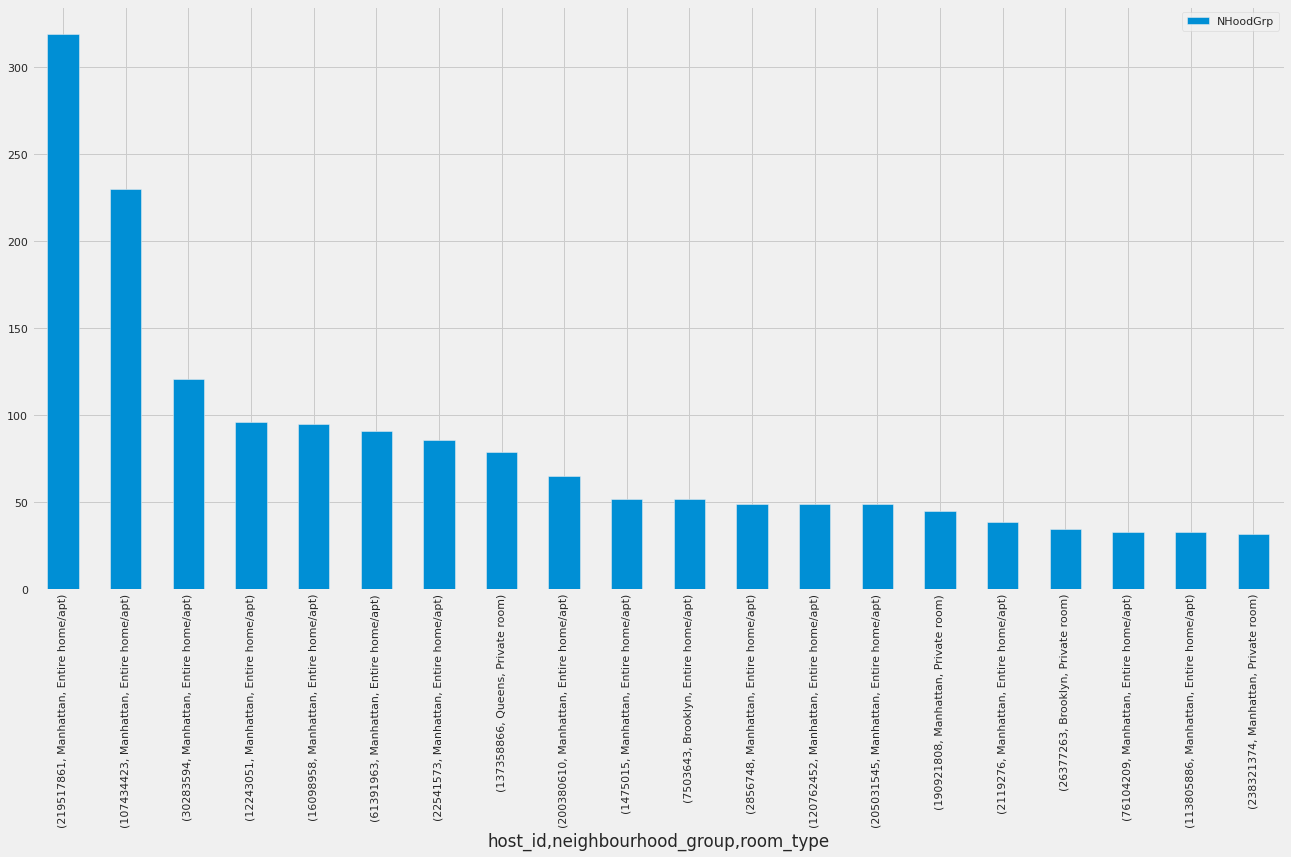

In [ ]:
#df_hst_NHoodGrp=
df.groupby(['host_id','neighbourhood_group','room_type']).agg(
    NHoodGrp=pd.NamedAgg(column='neighbourhood_group', aggfunc='count')
    
    ).nlargest(20,'NHoodGrp').plot(kind='bar')
#df_hst_NHoodGrp.reset_index()
#df_hst_NHoodGrp.


AttributeError: ignored

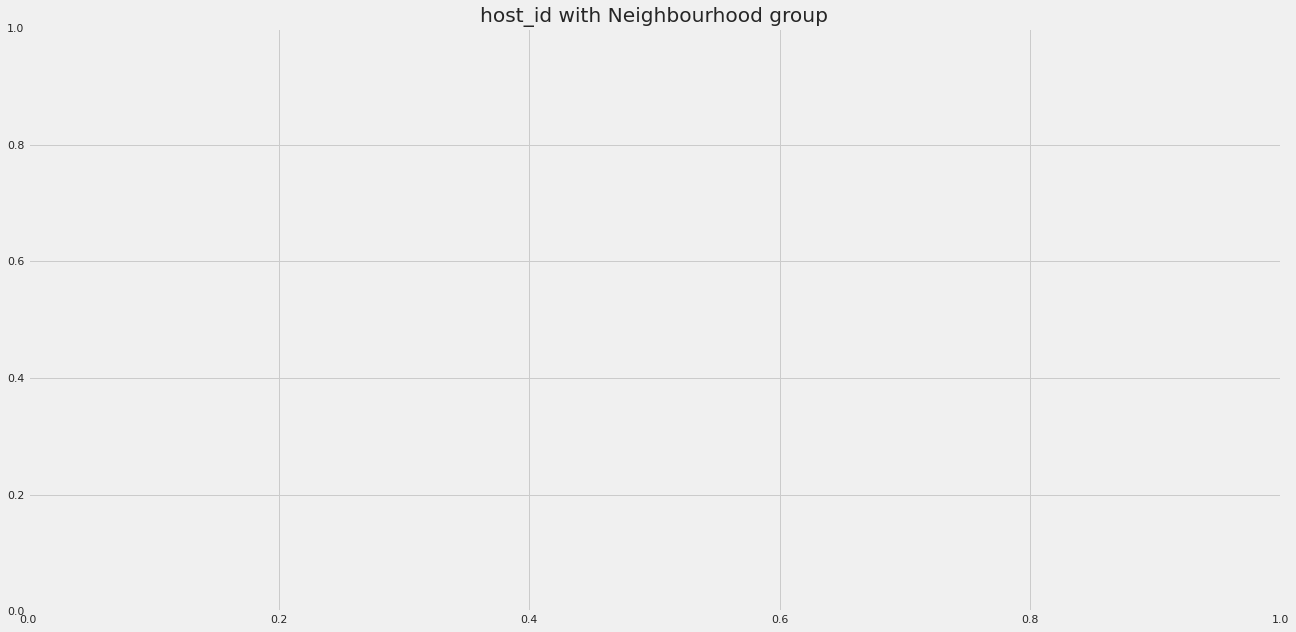

In [ ]:
plt.title('host_id with Neighbourhood group')
sns.countplot(df_hst_NHoodGrp.host_id,hue=df_hst_NHoodGrp.neighbourhood_group,palette='muted')

Just another method to 
Group by variation for practice

In [ ]:

#df.groupby('host_id').agg({'neighbourhood_group':'sum'})

,neighbourhood_group
host_id,
2438,Brooklyn
2571,Brooklyn
2787,BrooklynBrooklynBrooklynBrooklynBrooklynBrooklyn
2845,ManhattanManhattan
2868,Brooklyn
...,...
274273284,Manhattan
274298453,Brooklyn
274307600,Brooklyn


In [ ]:
df

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,0.00,2,9
48891,6570630,Brooklyn,Bushwick,Private room,40,4,0,0.00,2,36
48892,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,0.00,1,27
48893,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,0.00,6,2


In [ ]:
df_host_NhoodGrp=pd.DataFrame(df.value_counts(['host_id','neighbourhood_group']).nlargest(n=10)).copy()

In [ ]:
df_host_NhoodGrp.reset_index()

,host_id,neighbourhood_group,0
0,219517861,Manhattan,327
1,107434423,Manhattan,230
2,30283594,Manhattan,121
3,16098958,Manhattan,96
4,12243051,Manhattan,96
5,61391963,Manhattan,91
6,22541573,Manhattan,86
7,137358866,Queens,79
8,200380610,Manhattan,65
9,7503643,Brooklyn,52


In [ ]:
df_host_NhoodGrp

,,0
host_id,neighbourhood_group,
219517861,Manhattan,327
107434423,Manhattan,230
30283594,Manhattan,121
16098958,Manhattan,96
12243051,Manhattan,96
61391963,Manhattan,91
22541573,Manhattan,86
137358866,Queens,79
200380610,Manhattan,65


AttributeError: ignored

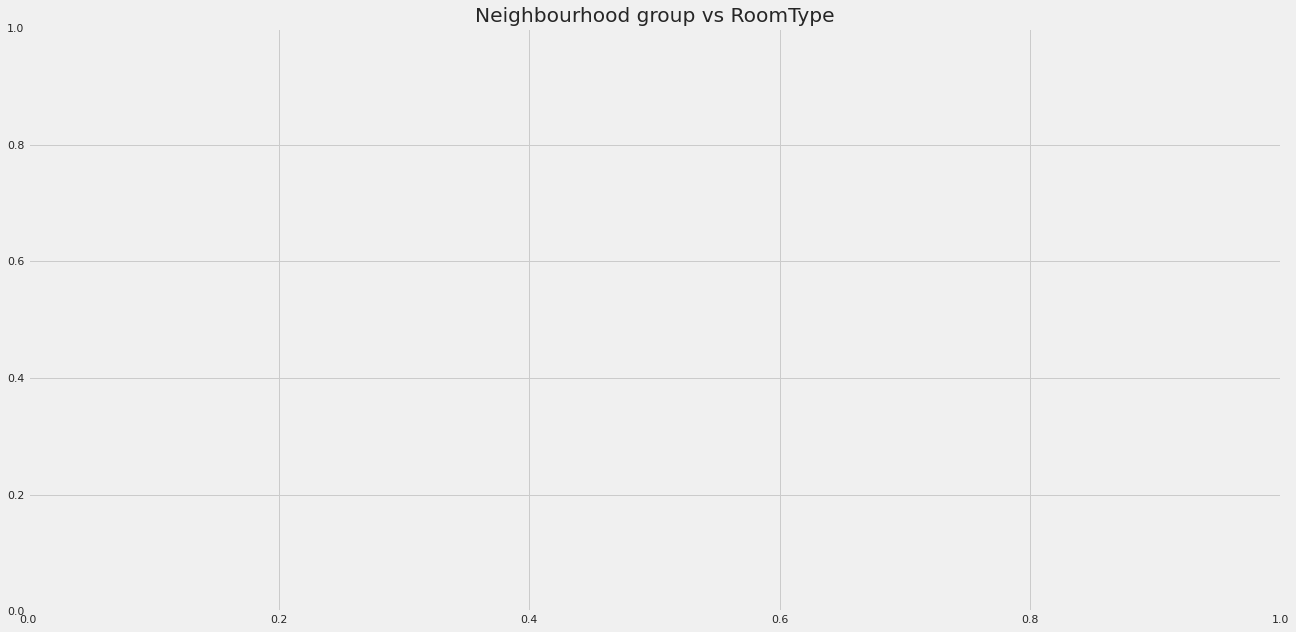

In [ ]:
plt.title('Neighbourhood group vs RoomType')
sns.countplot(df_host_NhoodGrp.neighbourhood_group,hue=df_host_NhoodGrp.host_id,palette='muted')

# Question 2
What areas have more traffic than others and why is that the case

WHY part is not clear to me

In [ ]:
# find top most host_id
cnt_AreaTraffic=df.neighbourhood.value_counts().nlargest(n=10)
df_AreaTraffic=pd.DataFrame(cnt_AreaTraffic)
df_AreaTraffic.reset_index(inplace=True)
df_AreaTraffic.rename(columns={'index':'Area','neighbourhood':'Listing_Count'},inplace=True)
df_AreaTraffic


,Area,Listing_Count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


[Text(0, 0, 'Williamsburg'),
 Text(0, 0, 'Bedford-Stuyvesant'),
 Text(0, 0, 'Harlem'),
 Text(0, 0, 'Bushwick'),
 Text(0, 0, 'Upper West Side'),
 Text(0, 0, "Hell's Kitchen"),
 Text(0, 0, 'East Village'),
 Text(0, 0, 'Upper East Side'),
 Text(0, 0, 'Crown Heights'),
 Text(0, 0, 'Midtown')]

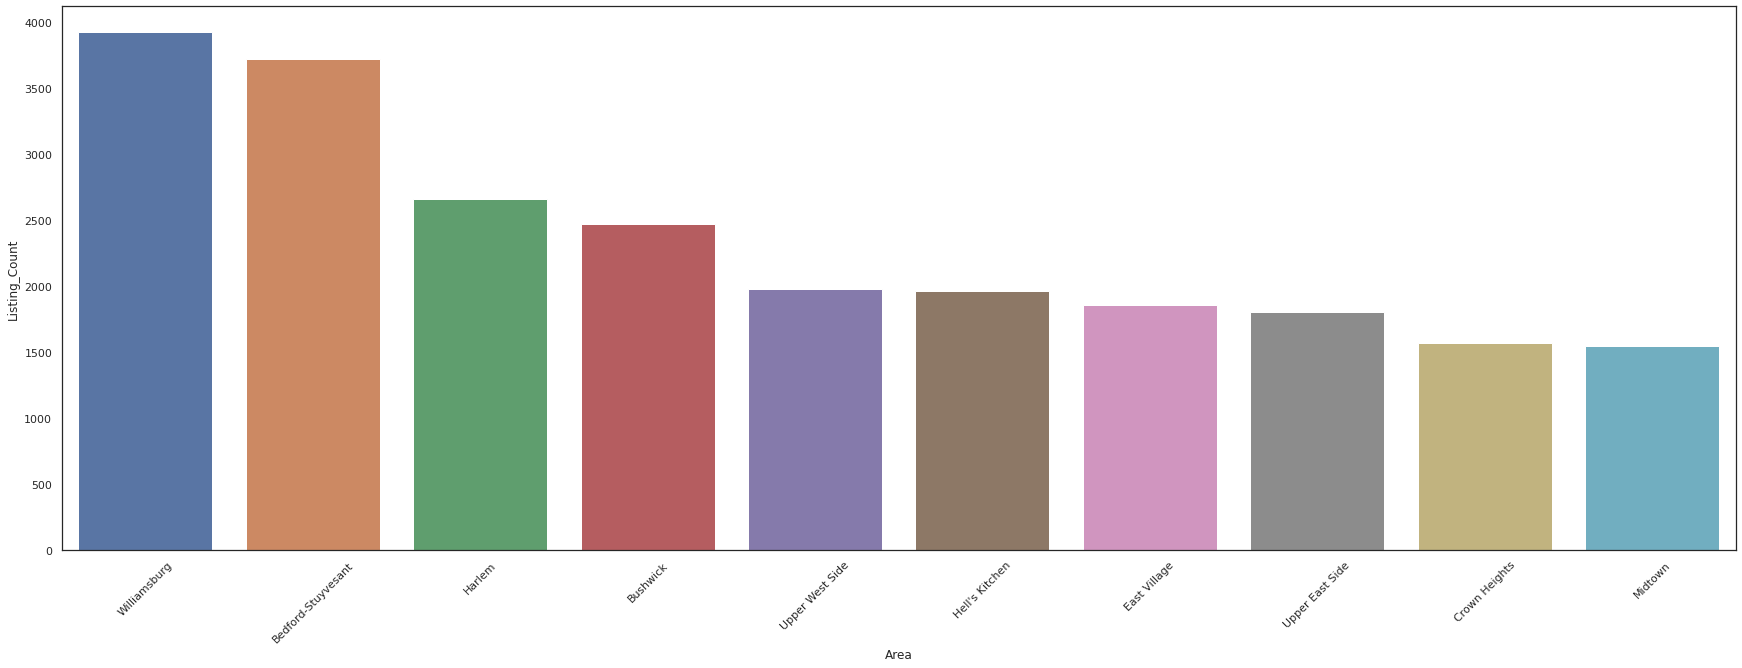

In [ ]:
AreaTraffic_plt=sns.barplot(x='Area',y='Listing_Count',data=df_AreaTraffic)
AreaTraffic_plt.set_xticklabels(AreaTraffic_plt.get_xticklabels(),rotation=45)

# Question 3:
Are there any relatioships between prices, number of reviews and the number of days that a given listing is booked

Best way to fill in the null values with mean or any other function
fillna+ groupby+ transform + function 

In [ ]:
#df['reviews_per_month'] = df['reviews_per_month'].fillna(df.groupby('host_id')['reviews_per_month'].transform('mean'))

In [ ]:
#df.groupby('host_id').mean()

In [ ]:
corr=df.corr()

In [ ]:
corr

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
price,0.015309,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.017364,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.140106,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.209783,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.154950,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.203492,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


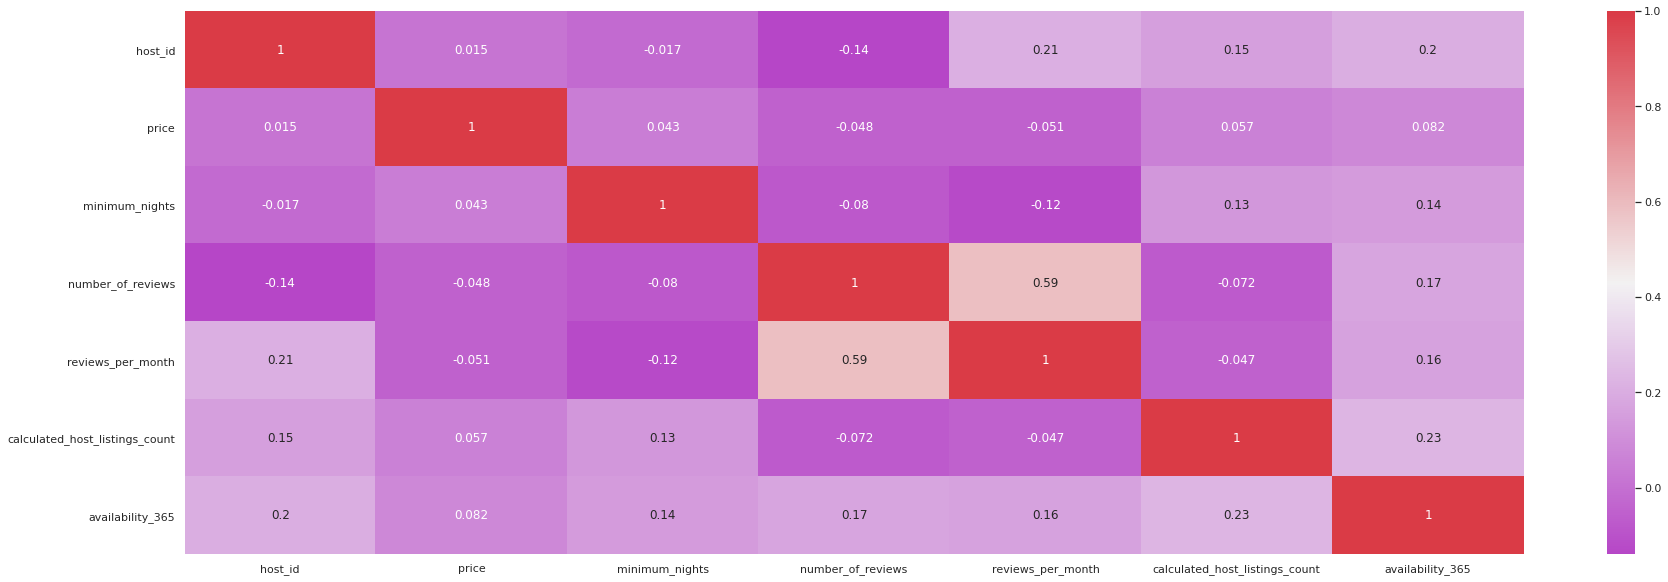

In [ ]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap = sns.diverging_palette(300,10,as_cmap=True))

In [ ]:
# Above heatmap shows good correlation between number_of_reviews and reviews_per_month

In [ ]:
#sns.pairplot(df)

# Ignore below this

# Ignore below code

In [ ]:
def printhist(colToPlot,color):
  xmin=min(df[colToPlot])
  xmax= max(df[colToPlot])
  width=xmax-xmin
  print(xmin, xmax, width)
  #print(df[colToPlot])
  bins=np.arange(xmin,xmax,width/20)
  print(bins)
  sns.histplot(df[colToPlot],color=color,kde=False,bins=bins)

In [ ]:
featureDicToPlot={'price':'red','minimum_nights':'green','number_of_reviews':'yellow','reviews_per_month':'blue'}#,'calculated_host_listings_count','availability_365']


price red
0 10000 10000
[   0.  500. 1000. 1500. 2000. 2500. 3000. 3500. 4000. 4500. 5000. 5500.
 6000. 6500. 7000. 7500. 8000. 8500. 9000. 9500.]
minimum_nights green
1 1250 1249
[1.00000e+00 6.34500e+01 1.25900e+02 1.88350e+02 2.50800e+02 3.13250e+02
 3.75700e+02 4.38150e+02 5.00600e+02 5.63050e+02 6.25500e+02 6.87950e+02
 7.50400e+02 8.12850e+02 8.75300e+02 9.37750e+02 1.00020e+03 1.06265e+03
 1.12510e+03 1.18755e+03]
number_of_reviews yellow
0 629 629
[  0.    31.45  62.9   94.35 125.8  157.25 188.7  220.15 251.6  283.05
 314.5  345.95 377.4  408.85 440.3  471.75 503.2  534.65 566.1  597.55]
reviews_per_month blue
0.0 58.5 58.5
[ 0.     2.925  5.85   8.775 11.7   14.625 17.55  20.475 23.4   26.325
 29.25  32.175 35.1   38.025 40.95  43.875 46.8   49.725 52.65  55.575]


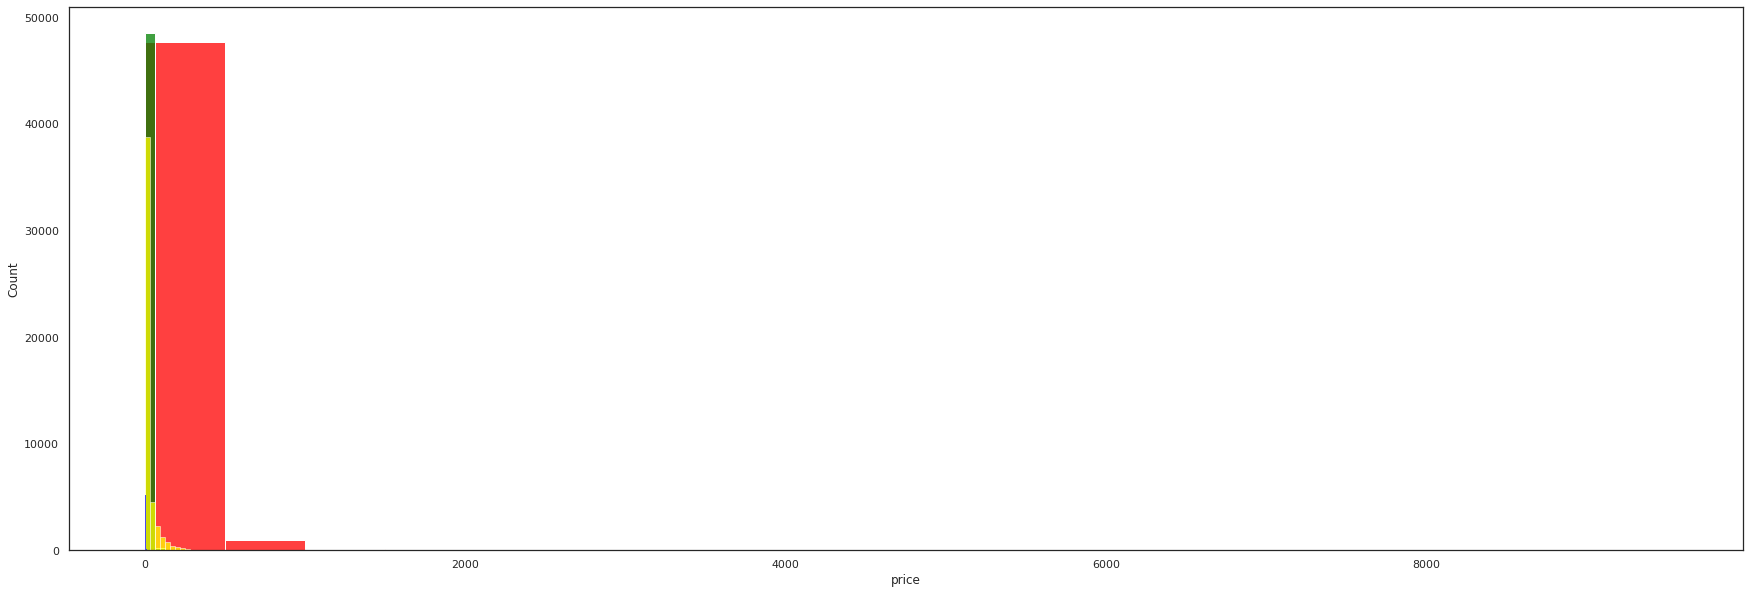

In [ ]:
for featureToPlot in featureDicToPlot:
  print(featureToPlot,featureDicToPlot[featureToPlot])
  printhist(featureToPlot,featureDicToPlot[featureToPlot])

In [ ]:
colsForPlot=['price','minimum_nights'] #,'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
colorToPlot=['red','green']

0 10000 10000
[   0.  500. 1000. 1500. 2000. 2500. 3000. 3500. 4000. 4500. 5000. 5500.
 6000. 6500. 7000. 7500. 8000. 8500. 9000. 9500.]


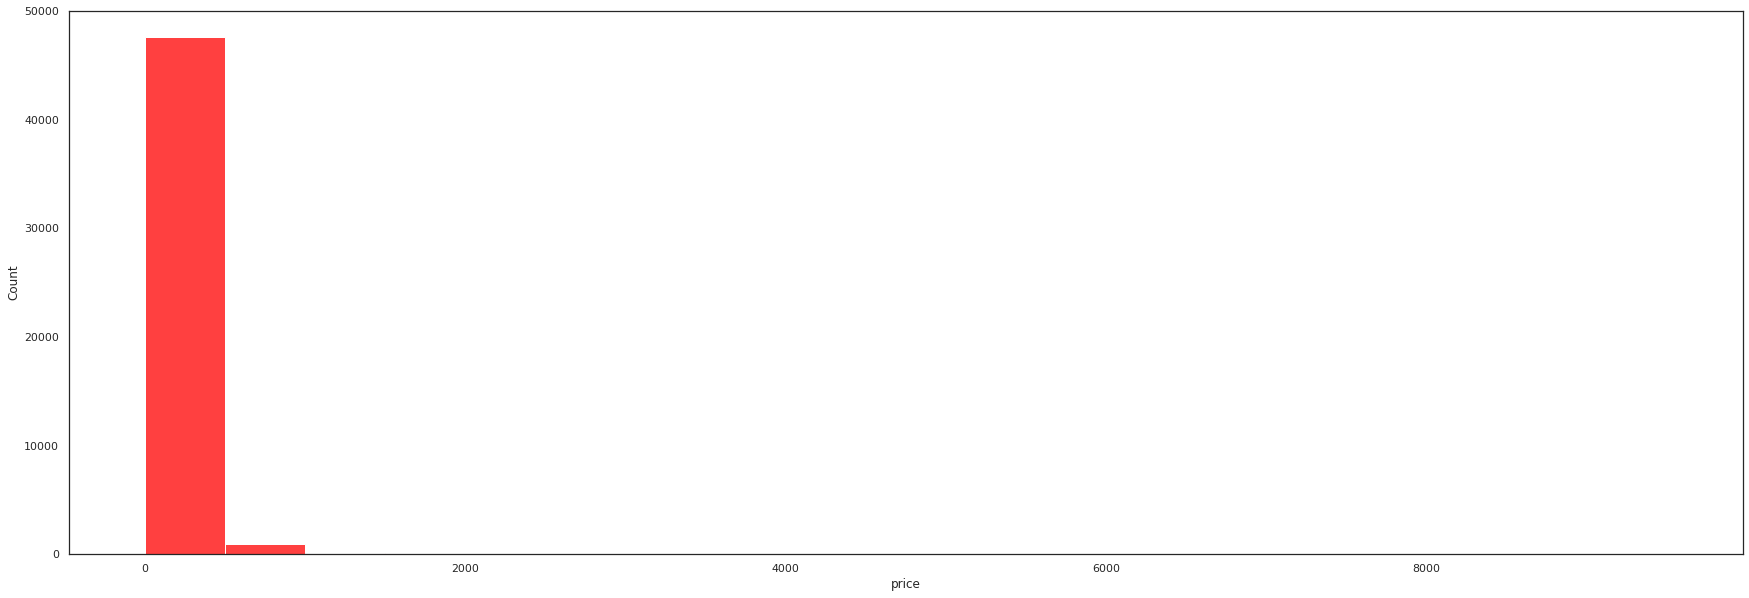

In [ ]:
 printhist('price','red')

1 1250 1249
[1.00000e+00 6.34500e+01 1.25900e+02 1.88350e+02 2.50800e+02 3.13250e+02
 3.75700e+02 4.38150e+02 5.00600e+02 5.63050e+02 6.25500e+02 6.87950e+02
 7.50400e+02 8.12850e+02 8.75300e+02 9.37750e+02 1.00020e+03 1.06265e+03
 1.12510e+03 1.18755e+03]


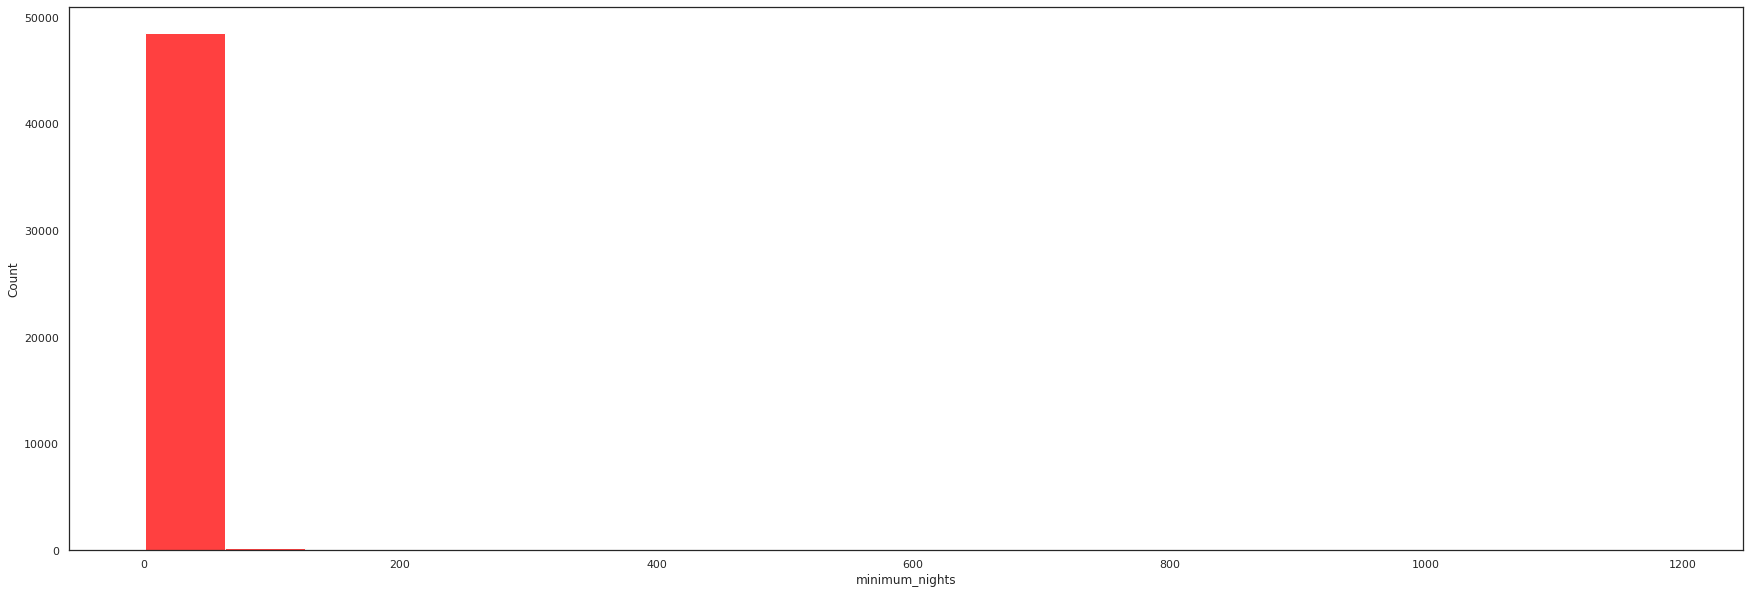

In [ ]:
 printhist('minimum_nights','red')

In [ ]:
for col,color in colsForPlot,colorToPlot:
  print(col,color)
  #printhist(col,'red')

price minimum_nights
red green
